# Restore individual models

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import os 
import matplotlib.pyplot as plt
from matplotlib.image import imread
from scipy.misc import imsave
from sklearn.utils import shuffle
from scipy.misc import imresize
import numpy as np
from numpy import genfromtxt
import tensorflow as tf
from PIL import Image
import pickle
# from tensorflow_vgg import vgg16
import collections
import time
import math

## Load Auto_Encoder_weights

In [3]:
# 10f - 15f
loaded_graph = tf.Graph()
save_model_path = './checkpoints_view_invariant/10to15_add-more-data_lr=0.005_nl=3_bs=80_dim=128.ckpt'
with tf.Session(graph=loaded_graph) as sess:
    # Load model
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)

    # Get Tensors from loaded model
    Au1w1 = loaded_graph.get_tensor_by_name('conv_layers/conv_weights_1:0').eval()
    Au1b1 = loaded_graph.get_tensor_by_name('conv_layers/bias_1:0').eval()
    Au1w2 = loaded_graph.get_tensor_by_name('conv_layers/conv_weights_2:0').eval()
    Au1b2 = loaded_graph.get_tensor_by_name('conv_layers/bias_2:0').eval()
    Au1w3 = loaded_graph.get_tensor_by_name('conv_layers/conv_weights_3:0').eval()
    Au1b3 = loaded_graph.get_tensor_by_name('conv_layers/bias_3:0').eval()
    Au1deW1 = loaded_graph.get_tensor_by_name('deconv_layers/deconv_weights_1:0').eval()
    Au1deB1 = loaded_graph.get_tensor_by_name('deconv_layers/debias_1:0').eval()

INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/10to15_add-more-data_lr=0.005_nl=3_bs=80_dim=128.ckpt


In [4]:
# 15f - 20f
loaded_graph = tf.Graph()
save_model_path = './checkpoints_view_invariant/15to20_add-more-data_lr=0.0002_nl=3_bs=80_dim=128.ckpt'
with tf.Session(graph=loaded_graph) as sess:
    # Load model
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)

    # Get Tensors from loaded model
    Au2deW1 = loaded_graph.get_tensor_by_name('deconv_layers/deconv_weights_1:0').eval()
    Au2deB1 = loaded_graph.get_tensor_by_name('deconv_layers/debias_1:0').eval()
#     Au3deW2 = loaded_graph.get_tensor_by_name('deconv_layers/deconv_weights_2:0').eval()
#     Au3deB2 = loaded_graph.get_tensor_by_name('deconv_layers/debias_2:0').eval()
#     Au3outW = loaded_graph.get_tensor_by_name('output_layer/output_weights:0').eval()
#     Au3outb = loaded_graph.get_tensor_by_name('output_layer/outbias_1:0').eval()

INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/15to20_add-more-data_lr=0.0002_nl=3_bs=80_dim=128.ckpt


In [5]:
# 20f - full
loaded_graph = tf.Graph()
save_model_path = './checkpoints_view_invariant/20tofull_add-more-data_lr=0.0002_nl=3_bs=80_dim=128.ckpt'
with tf.Session(graph=loaded_graph) as sess:
    # Load model
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)

    # Get Tensors from loaded model
    Au3deW1 = loaded_graph.get_tensor_by_name('deconv_layers/deconv_weights_1:0').eval()
    Au3deB1 = loaded_graph.get_tensor_by_name('deconv_layers/debias_1:0').eval()
    Au3deW2 = loaded_graph.get_tensor_by_name('deconv_layers/deconv_weights_2:0').eval()
    Au3deB2 = loaded_graph.get_tensor_by_name('deconv_layers/debias_2:0').eval()
    Au3deW3 = loaded_graph.get_tensor_by_name('deconv_layers/deconv_weights_3:0').eval()
    Au3deB3 = loaded_graph.get_tensor_by_name('deconv_layers/debias_3:0').eval()
    Au3outW = loaded_graph.get_tensor_by_name('output_layer/output_weights:0').eval()
    Au3outB = loaded_graph.get_tensor_by_name('output_layer/outbias_1:0').eval()

INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/20tofull_add-more-data_lr=0.0002_nl=3_bs=80_dim=128.ckpt


In [6]:
Au4deW2.shape

(4, 4, 32, 64)

In [7]:
gallery_full = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_full_Seq00', mode='rb'))
probe_full = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_full_Seq01', mode='rb'))

# 5f
gallery_10f = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_Seq00', mode='rb'))
probe_10f = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_Seq01', mode='rb'))

gallery_10f_2 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_2_Seq00', mode='rb'))
probe_10f_2 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_2_Seq01', mode='rb'))

gallery_10f_3 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_3_Seq00', mode='rb'))
probe_10f_3 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_3_Seq01', mode='rb'))

gallery_10f_4 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_4_Seq00', mode='rb'))
probe_10f_4 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_4_Seq01', mode='rb'))

gallery_10f_5 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_5_Seq00', mode='rb'))
probe_10f_5 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_5_Seq01', mode='rb'))

gallery_10f_6 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_6_Seq00', mode='rb'))
probe_10f_6 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_6_Seq01', mode='rb'))

gallery_full = gallery_full/float(255)
probe_full = probe_full/float(255)

gallery_10f = gallery_10f/float(255)
probe_10f = probe_10f/float(255)

gallery_10f_2 = gallery_10f_2/float(255)
probe_10f_2 = probe_10f_2/float(255)

gallery_10f_3 = gallery_10f_3/float(255)
probe_10f_3 = probe_10f_3/float(255)

gallery_10f_4 = gallery_10f_4/float(255)
probe_10f_4 = probe_10f_4/float(255)

gallery_10f_5 = gallery_10f_5/float(255)
probe_10f_5 = probe_10f_5/float(255)

gallery_10f_6 = gallery_10f_6/float(255)
probe_10f_6 = probe_10f_6/float(255)

# # 10f 
# gallery_10f = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_Seq00', mode='rb'))
# probe_10f = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_Seq01', mode='rb'))

# gallery_10f_2 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_2_Seq00', mode='rb'))
# probe_10f_2 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_2_Seq01', mode='rb'))

# gallery_10f_3 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_3_Seq00', mode='rb'))
# probe_10f_3 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_3_Seq01', mode='rb'))

# gallery_10f_4 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_4_Seq00', mode='rb'))
# probe_10f_4 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_4_Seq01', mode='rb'))

# # gallery_10f_5 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_5_Seq00', mode='rb'))
# # probe_10f_5 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_5_Seq01', mode='rb'))

# # gallery_10f_6 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_6_Seq00', mode='rb'))
# # probe_10f_6 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_6_Seq01', mode='rb'))

# gallery_10f = gallery_10f/float(255)
# probe_10f = probe_10f/float(255)

# gallery_10f_2 = gallery_10f_2/float(255)
# probe_10f_2 = probe_10f_2/float(255)

# gallery_10f_3 = gallery_10f_3/float(255)
# probe_10f_3 = probe_10f_3/float(255)

# gallery_10f_4 = gallery_10f_4/float(255)
# probe_10f_4 = probe_10f_4/float(255)

# # gallery_10f_5 = gallery_10f_5/float(255)
# # probe_10f_5 = probe_10f_5/float(255)

# # gallery_10f_6 = gallery_10f_6/float(255)
# # probe_10f_6 = probe_10f_6/float(255)

# # 15f 
# gallery_15f = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_15f_Seq00', mode='rb'))
# probe_15f = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_15f_Seq01', mode='rb'))

# gallery_15f_2 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_15f_2_Seq00', mode='rb'))
# probe_15f_2 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_15f_2_Seq01', mode='rb'))

# gallery_15f_3 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_15f_3_Seq00', mode='rb'))
# probe_15f_3 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_15f_3_Seq01', mode='rb'))

# gallery_15f_4 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_15f_4_Seq00', mode='rb'))
# probe_15f_4 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_15f_4_Seq01', mode='rb'))

# # gallery_15f_5 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_15f_5_Seq00', mode='rb'))
# # probe_15f_5 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_15f_5_Seq01', mode='rb'))

# # gallery_15f_6 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_15f_6_Seq00', mode='rb'))
# # probe_15f_6 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_15f_6_Seq01', mode='rb'))

# gallery_15f = gallery_15f/float(255)
# probe_15f = probe_15f/float(255)

# gallery_15f_2 = gallery_15f_2/float(255)
# probe_15f_2 = probe_15f_2/float(255)

# gallery_15f_3 = gallery_15f_3/float(255)
# probe_15f_3 = probe_15f_3/float(255)

# gallery_15f_4 = gallery_15f_4/float(255)
# probe_15f_4 = probe_15f_4/float(255)

# # gallery_15f_5 = gallery_15f_5/float(255)
# # probe_15f_5 = probe_15f_5/float(255)

# # gallery_15f_6 = gallery_15f_6/float(255)
# # probe_15f_6 = probe_15f_6/float(255)

# # 20f 
# gallery_20f = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_20f_Seq00', mode='rb'))
# probe_20f = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_20f_Seq01', mode='rb'))

# gallery_20f_2 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_20f_2_Seq00', mode='rb'))
# probe_20f_2 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_20f_2_Seq01', mode='rb'))

# gallery_20f_3 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_20f_3_Seq00', mode='rb'))
# probe_20f_3 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_20f_3_Seq01', mode='rb'))

# gallery_20f_4 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_20f_4_Seq00', mode='rb'))
# probe_20f_4 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_20f_4_Seq01', mode='rb'))

# # gallery_20f_5 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_20f_5_Seq00', mode='rb'))
# # probe_20f_5 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_20f_5_Seq01', mode='rb'))

# # gallery_20f_6 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_20f_6_Seq00', mode='rb'))
# # probe_20f_6 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_20f_6_Seq01', mode='rb'))

# gallery_20f = gallery_20f/float(255)
# probe_20f = probe_20f/float(255)

# gallery_20f_2 = gallery_20f_2/float(255)
# probe_20f_2 = probe_20f_2/float(255)

# gallery_20f_3 = gallery_20f_3/float(255)
# probe_20f_3 = probe_20f_3/float(255)

# gallery_20f_4 = gallery_20f_4/float(255)
# probe_20f_4 = probe_20f_4/float(255)

# gallery_20f_5 = gallery_20f_5/float(255)
# probe_20f_5 = probe_20f_5/float(255)

# gallery_20f_6 = gallery_20f_6/float(255)
# probe_20f_6 = probe_20f_6/float(255)

In [8]:
# Train X
train_x = np.concatenate([gallery_10f[:2146, 3], probe_10f[:2146, 3], gallery_10f_2[:2146, 3], 
                          probe_10f_2[:2146, 3], gallery_10f_3[:2146, 3], probe_10f_3[:2146, 3],
                          gallery_10f_4[:2146, 3], probe_10f_4[:2146, 3], gallery_10f_5[:2146, 3], 
                          probe_10f_5[:2146, 3], gallery_10f_6[:2146, 3], probe_10f_6[:2146, 3]],axis=0)
train_x = np.reshape(train_x, [train_x.shape[0], train_x.shape[1], train_x.shape[2], 1])
# Train Y
train_y = np.concatenate([gallery_full[:2146, 3], probe_full[:2146, 3], gallery_full[:2146, 3], 
                          probe_full[:2146, 3], gallery_full[:2146, 3], probe_full[:2146, 3],
                          gallery_full[:2146, 3], probe_full[:2146, 3], gallery_full[:2146, 3], 
                          probe_full[:2146, 3], gallery_full[:2146, 3], probe_full[:2146, 3]], axis=0)
train_y = np.reshape(train_y, [train_y.shape[0], train_y.shape[1], train_y.shape[2], 1])
print('train_x', train_x.shape, 'train_y', train_y.shape)

# Val X
val_x = np.concatenate([gallery_10f[2146:2646, 3], probe_10f[2146:2646, 3], gallery_10f_2[2146:2646, 3], 
                        probe_10f_2[2146:2646, 3], gallery_10f_3[2146:2646, 3], probe_10f_3[2146:2646, 3],
                        gallery_10f_4[2146:2646, 3], probe_10f_4[2146:2646, 3], gallery_10f_5[2146:2646, 3], 
                        probe_10f_5[2146:2646, 3], gallery_10f_6[2146:2646, 3], probe_10f_6[2146:2646, 3]], axis=0)
val_x = np.reshape(val_x, [val_x.shape[0], val_x.shape[1], val_x.shape[2], 1])
# Val Y
val_y = np.concatenate([gallery_full[2146:2646, 3], probe_full[2146:2646, 3], gallery_full[2146:2646, 3], 
                        probe_full[2146:2646, 3], gallery_full[2146:2646, 3], probe_full[2146:2646, 3],
                        gallery_full[2146:2646, 3], probe_full[2146:2646, 3], gallery_full[2146:2646, 3], 
                        probe_full[2146:2646, 3], gallery_full[2146:2646, 3], probe_full[2146:2646, 3]], axis=0)
val_y = np.reshape(val_y, [val_y.shape[0], val_y.shape[1], val_y.shape[2], 1])
print('val_x', val_x.shape, 'val_y', val_y.shape)

# Test X
test_x = np.concatenate([gallery_10f[2646:, 3], probe_10f[2646:, 3], gallery_10f_2[2646:, 3], 
                         probe_10f_2[2646:, 3], gallery_10f_3[2646:, 3],probe_10f_3[2646:, 3],
                         gallery_10f_4[2646:, 3],probe_10f_4[2646:, 3], gallery_10f_5[2646:, 3],
                         probe_10f_5[2646:, 3], gallery_10f_6[2646:, 3],probe_10f_6[2646:, 3]], axis=0)
test_x = np.reshape(test_x, [test_x.shape[0], test_x.shape[1], test_x.shape[2], 1])
# Test Y
test_y = np.concatenate([gallery_full[2646:, 3], probe_full[2646:, 3], gallery_full[2646:, 3], 
                         probe_full[2646:, 3], gallery_full[2646:, 3], probe_full[2646:, 3],
                         gallery_full[2646:, 3], probe_full[2646:, 3], gallery_full[2646:, 3], 
                         probe_full[2646:, 3], gallery_full[2646:, 3], probe_full[2646:, 3]], axis=0)
test_y = np.reshape(test_y, [test_y.shape[0], test_y.shape[1], test_y.shape[2], 1])
print('test_x', test_x.shape, 'test_y', test_y.shape)

train_x (25752, 64, 64, 1) train_y (25752, 64, 64, 1)
val_x (6000, 64, 64, 1) val_y (6000, 64, 64, 1)
test_x (6000, 64, 64, 1) test_y (6000, 64, 64, 1)


## Build End to End

In [9]:
def conv_layer(inputs_, weight, weight_name, bias, bias_name, conv_name, pool_name, bn_name, relu_name, add_bacth_norm=True, is_training=True,
               out_dim=1, conv_kernsize=(2,2), conv_strides=(1,1), pool_size=(2,2), pool_strides=(2,2), keep_prob=0.5):
    ### Encoder
    # e.g. out_dim: 8; kern_size: (3,3); pool_size: (2,2); strides: (2,2);
    
    # Weights
    Weights = tf.Variable(weight, name=weight_name)
    
    # Bias
    Bias = tf.Variable(bias, name=bias_name)
    
    # set strides of conv2d
    stride = [1, conv_strides[0], conv_strides[1], 1]
    
    # conv2d
    # filter:[filter_height, filter_width, in_channels, out_channels]
    # input:[batch, in_height, in_width, in_channels]
    conv2d = tf.nn.bias_add(tf.nn.conv2d(inputs_, Weights, stride, padding='SAME', name=conv_name), Bias)
            
    # add activation function
    conv2d = tf.nn.relu(conv2d, name=relu_name)
    
    # add Max pooling
    conv2d = tf.nn.max_pool(conv2d, [1,pool_size[0],pool_size[1],1],\
                                    [1,pool_strides[0],pool_strides[1],1], padding='SAME', name=pool_name)
                    
    conv2d = tf.layers.dropout(conv2d, rate=keep_prob)
    
    # Now 28x28x
    if add_bacth_norm:
        conv2d = tf.layers.batch_normalization(conv2d, training=is_training, name=bn_name)

    return conv2d

def deconv_layer(encoded, up_name, weight, weight_name, bias, bias_name, de_conv_name, bn_name, relu_name, add_batch_norm=True, is_training=True,
                 up_size=[(2,2),(4,4),(5,5),(6,6)], out_dim=1, conv_kernsize=(2,2), conv_strides=(1,1), keep_prob=0.5):
    ### Decoder
    upsample = tf.image.resize_nearest_neighbor(encoded, up_size, name=up_name) # up_size: e.g.(7,7)
    
    # Weights
    Weights = tf.Variable(weight, name=weight_name)
    
    # Bias
    Bias = tf.Variable(bias, name=bias_name)
    
    # set strides of conv2d
    stride = [1, conv_strides[0], conv_strides[1], 1]
    
    # conv2d
    conv2d = tf.nn.bias_add(tf.nn.conv2d(upsample, Weights, stride, padding='SAME', name=de_conv_name),\
                   Bias)
    
    conv2d = tf.nn.relu(conv2d, name=relu_name)
    
    conv2d = tf.layers.dropout(conv2d, rate=keep_prob)
    
    if add_batch_norm:
        conv2d = tf.layers.batch_normalization(conv2d, training=is_training, name=bn_name)

    return conv2d

def output_layer(conv2d, weight, weight_name, bias, bias_name, logits_name, bn_name, decoded_name, add_batch_norm=True, is_training=True, 
                 out_dim=1, conv_kernsize=(3,3), conv_strides=(1,1)):
    # Weights
    Weights = tf.Variable(weight, name=weight_name)
    
    # Bias
    Bias = tf.Variable(bias, name=bias_name)
    
    # set strides of conv2d
    stride = [1, conv_strides[0], conv_strides[1], 1]
    
    # conv2d
    logits = tf.nn.bias_add(tf.nn.conv2d(conv2d, Weights, stride, padding='SAME', name=logits_name),\
                   Bias)
    
#     if add_batch_norm:
#         conv2d = tf.layers.batch_normalization(conv2d, training=is_training, name=bn_name)
    #Now 28x28x1
    decoded = tf.nn.sigmoid(logits, name=decoded_name)
    
    return logits, decoded

In [10]:
conv_kern_size = (4,4)
conv_strides = (1,1)
pool_size = (2,2)
pool_strides = (2,2)
up_size = [(16,16), (32,32), (64,64)]
de_kern_size = (4,4)
de_conv_strides = (1,1)
out_kern_size = (4,4)
out_strides = (1,1)


g = tf.Graph()
tf.reset_default_graph()
with g.as_default():
    
    Au1_Weights_1 = tf.convert_to_tensor(Au1w1, dtype=tf.float32)
    Au1_Bias_1 = tf.convert_to_tensor(Au1b1, dtype=tf.float32)
    Au1_Weights_2 = tf.convert_to_tensor(Au1w2, dtype=tf.float32)
    Au1_Bias_2 = tf.convert_to_tensor(Au1b2, dtype=tf.float32)
    Au1_Weights_3 = tf.convert_to_tensor(Au1w3, dtype=tf.float32)
    Au1_Bias_3 = tf.convert_to_tensor(Au1b3, dtype=tf.float32)
    Au1_deWeights_1 = tf.convert_to_tensor(Au1deW1, dtype=tf.float32)
    Au1_deBias_1 = tf.convert_to_tensor(Au1deB1, dtype=tf.float32)
    
    Au2_deWeights_1 = tf.convert_to_tensor(Au2deW1, dtype=tf.float32)
    Au2_deBias_1 = tf.convert_to_tensor(Au2deB1, dtype=tf.float32)
    
    Au3_deWeights_1 = tf.convert_to_tensor(Au3deW1, dtype=tf.float32)
    Au3_deBias_1 = tf.convert_to_tensor(Au3deB1, dtype=tf.float32)
    Au3_deWeights_2 = tf.convert_to_tensor(Au3deW2, dtype=tf.float32)
    Au3_deBias_2 = tf.convert_to_tensor(Au3deB2, dtype=tf.float32)
    Au3_deWeights_3 = tf.convert_to_tensor(Au3deW3, dtype=tf.float32)
    Au3_deBias_3 = tf.convert_to_tensor(Au3deB3, dtype=tf.float32)
    Au3_outWeights = tf.convert_to_tensor(Au3outW, dtype=tf.float32)
    Au3_outBias = tf.convert_to_tensor(Au3outB, dtype=tf.float32)
    
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    keep_p = tf.placeholder(tf.float32, name="keep_prob")
    training = tf.placeholder(tf.bool, name='training')
    inputs = tf.placeholder(tf.float32, [None, 64, 64, 1], name='inputs')
    targets = tf.placeholder(tf.float32, [None, 64, 64, 1], name='targets')

    # 128x88 -- 16x11
    with tf.name_scope('conv_layer'):
        # outdim 
        maxpool_1 = conv_layer(inputs, Au1_Weights_1, 'weight_1', Au1_Bias_1, 'bias_1', 'conv_1', 'pool_1', 'bn_1', 'relu_1', add_bacth_norm=False, 
                               is_training=training, out_dim=128, conv_kernsize=conv_kern_size, conv_strides=conv_strides, 
                               pool_size=pool_size, pool_strides=pool_strides, keep_prob=keep_p)
        # 32x32x128
        maxpool_2 = conv_layer(maxpool_1, Au1_Weights_2, 'weight_2', Au1_Bias_2, 'bias_2', 'conv_2', 'pool_2', 'bn_2', 'relu_2', add_bacth_norm=True, 
                               is_training=training, out_dim=64, conv_kernsize=conv_kern_size, conv_strides=conv_strides, 
                               pool_size=pool_size, pool_strides=pool_strides, keep_prob=keep_p)
        # 16x16x64
        maxpool_3 = conv_layer(maxpool_2, Au1_Weights_3, 'weight_3', Au1_Bias_3, 'bias_3', 'conv_3', 'pool_3', 'bn_3', 'relu_3', add_bacth_norm=True, 
                               is_training=training, out_dim=32, conv_kernsize=conv_kern_size, conv_strides=conv_strides, 
                               pool_size=pool_size, pool_strides=pool_strides, keep_prob=keep_p)
        # 8x8x32
    with tf.name_scope('hidden_layers'):
        # outdim 8 -- 8
        stride = [1, conv_strides[0], conv_strides[1], 1]
        
        # 10f - 15f 16x11x8 -- 16x11x8
        Au1deWeights1 = tf.Variable(Au1_deWeights_1, name='h_weight_1')
        Au1deBias1 = tf.Variable(Au1_deBias_1, name='h_bias_1')
        conv_hidden_1 = tf.nn.bias_add(tf.nn.conv2d(maxpool_3, Au1deWeights1, stride, padding='SAME', name='hidden_1'), Au1deBias1)
        conv_hidden_1 = tf.layers.batch_normalization(conv_hidden_1, training=training, name='h_bn_1')
        
#         conv_hidden_1 = tf.nn.bias_add(tf.nn.conv2d(conv_hidden_1, Au1deWeights1, stride, padding='SAME', name='hidden_1_1'), Au1deBias1)
#         conv_hidden_1 = tf.layers.batch_normalization(conv_hidden_1, training=training, name='h_bn_1_1')
        
#         conv_hidden_1 = tf.nn.bias_add(tf.nn.conv2d(conv_hidden_1, Au1deWeights1, stride, padding='SAME', name='hidden_1_2'), Au1deBias1)
#         conv_hidden_1 = tf.layers.batch_normalization(conv_hidden_1, training=training, name='h_bn_1_2')
        
        # 15f - 20f 16x11x8 -- 16x11x8
        Au2deWeights1 = tf.Variable(Au2_deWeights_1, name='h_weight_2')
        Au2deBias1 = tf.Variable(Au2_deBias_1, name='h_bias_2')
        conv_hidden_2 = tf.nn.bias_add(tf.nn.conv2d(conv_hidden_1, Au2deWeights1, stride, padding='SAME', name='hidden_2'), Au2deBias1)
        conv_hidden_2 = tf.layers.batch_normalization(conv_hidden_2, training=training, name='h_bn_2')
        
#         conv_hidden_2 = tf.nn.bias_add(tf.nn.conv2d(conv_hidden_2, Au2deWeights1, stride, padding='SAME', name='hidden_2_1'), Au2deBias1)
#         conv_hidden_2 = tf.layers.batch_normalization(conv_hidden_2, training=training, name='h_bn_2_1')
        
#         conv_hidden_2 = tf.nn.bias_add(tf.nn.conv2d(conv_hidden_2, Au2deWeights1, stride, padding='SAME', name='hidden_2_2'), Au2deBias1)
#         conv_hidden_2 = tf.layers.batch_normalization(conv_hidden_2, training=training, name='h_bn_2_2')

        # 15f - 20f 16x11x8 -- 16x11x8
#         Au3deWeights1 = tf.Variable(Au3_deWeights_1, name='h_weight_3')
#         Au3deBias1 = tf.Variable(Au3_deBias_1, name='h_bias_3')
#         conv_hidden_3 = tf.nn.bias_add(tf.nn.conv2d(conv_hidden_2, Au3deWeights1, stride, padding='SAME', name='hidden_3'), Au3deBias1)
#         conv_hidden_3 = tf.layers.batch_normalization(conv_hidden_3, training=training, name='h_bn_3')
        
#         conv_hidden_3 = tf.nn.bias_add(tf.nn.conv2d(conv_hidden_3, Au3deWeights1, stride, padding='SAME', name='hidden_3_1'), Au3deBias1)
#         conv_hidden_3 = tf.layers.batch_normalization(conv_hidden_3, training=training, name='h_bn_3_1')
    
#         conv_hidden_3 = tf.nn.bias_add(tf.nn.conv2d(conv_hidden_3, Au3deWeights1, stride, padding='SAME', name='hidden_3_2'), Au3deBias1)
#         conv_hidden_3 = tf.layers.batch_normalization(conv_hidden_3, training=training, name='h_bn_3_2')

        # 20f - full 16x11x8 -- 16x11x8
        Au3deWeights1 = tf.Variable(Au3_deWeights_1, name='h_weight_3')
        Au3deBias1 = tf.Variable(Au3_deBias_1, name='h_bias_3')
        conv_hidden_3 = tf.nn.bias_add(tf.nn.conv2d(conv_hidden_2, Au3deWeights1, stride, padding='SAME', name='hidden_3'), Au3deBias1)
        conv_hidden_3 = tf.layers.batch_normalization(conv_hidden_3, training=training, name='h_bn_3')
        
#         conv_hidden_4 = tf.nn.bias_add(tf.nn.conv2d(conv_hidden_4, Au4deWeights1, stride, padding='SAME', name='hidden_4_1'), Au4deBias1)
#         conv_hidden_4 = tf.layers.batch_normalization(conv_hidden_4, training=training, name='h_bn_4_1')
        
#         conv_hidden_4 = tf.nn.bias_add(tf.nn.conv2d(conv_hidden_4, Au4deWeights1, stride, padding='SAME', name='hidden_4_2'), Au4deBias1)
#         conv_hidden_4 = tf.layers.batch_normalization(conv_hidden_4, training=training, name='h_bn_4_2')

    with tf.name_scope('deconv_layers'):
        # outdim 8 -- 16
        deconv_1 = deconv_layer(conv_hidden_3, 'up_1', Au3_deWeights_1, 'deWeight_1', Au3_deBias_1, 'deBias_1', 'deconv_1', 'debn_1', 'derelu_1', add_batch_norm=True, is_training=training,
                     up_size=up_size[0], out_dim=32, conv_kernsize=de_kern_size, conv_strides=de_conv_strides, keep_prob=keep_p)
        
        deconv_2 = deconv_layer(deconv_1, 'up_2', Au3_deWeights_2, 'deWeight_2', Au3_deBias_2, 'deBias_2', 'deconv_2', 'debn_2', 'derelu_2', add_batch_norm=True, is_training=training,
                     up_size=up_size[1], out_dim=64, conv_kernsize=de_kern_size, conv_strides=de_conv_strides, keep_prob=keep_p)
        
        deconv_3 = deconv_layer(deconv_2, 'up_3', Au3_deWeights_3, 'deWeight_3', Au3_deBias_3, 'deBias_3', 'deconv_3', 'debn_3', 'derelu_3', add_batch_norm=True, is_training=training,
                     up_size=up_size[2], out_dim=128, conv_kernsize=de_kern_size, conv_strides=de_conv_strides, keep_prob=keep_p)

    with tf.name_scope('output_layer'):
        # outdim 32 -- 1
        logits, decoded = output_layer(deconv_3, Au3_outWeights, 'outWeight', Au3_outBias, 'outBias', 'logits', 'outbn', 'output', add_batch_norm=True, is_training=training, 
                                       out_dim=1, conv_kernsize=out_kern_size, conv_strides=out_strides)

    # Now 64x64x1 Output
    loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets, logits=logits, name='loss')
    cost = tf.reduce_mean(loss, name='cost')
    
    MSE = tf.reduce_mean(tf.losses.mean_squared_error(targets, decoded), name='MSE')
#     loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets, logits=logits, name='loss')
#     cost = tf.reduce_mean(loss, name='cost')
    opt = tf.train.AdamOptimizer(learning_rate).minimize(MSE)

    with tf.name_scope('saver'):
        saver = tf.train.Saver()

In [15]:
def get_batches(data, target, batch_size):
    n_batches = len(data)//batch_size
    data = data[:batch_size * n_batches]
    target = target[:batch_size * n_batches]
    for ii in range(0, batch_size*n_batches, batch_size):
        data_batch = data[ii:ii + batch_size]
        target_batch = target[ii:ii + batch_size]
        
        yield data_batch, target_batch
        
        
def cal_accuracy(decoded, target):
    error = abs(decoded - target)
    Acc = (np.sum(error <= 0.08)/(decoded.shape[0]*decoded.shape[1]*decoded.shape[2]*decoded.shape[3]))*100
    
    return Acc

In [16]:
# shuffle
train_x, train_y = shuffle(train_x, train_y)
val_x, val_y = shuffle(val_x, val_y)

In [18]:
epochs = 3000
num_layers = 3
batch_size = 80
is_save = False
dims = 128

for lr in [0.00006]:
    save_string = './checkpoints_view_invariant/10f-full_add_more_data_E2E_lr={}_bs={}_nl={}_dim={}.ckpt'.format(lr, batch_size, num_layers,dims)
    with tf.Session(config=tf.ConfigProto(log_device_placement=True), graph=g) as sess:
        sess.run(tf.global_variables_initializer())

        iteration = 1
        mean_val_loss = 0
        mean_val_acc = 0
        mean_val_mse = 0
        count_loss_not_decrease_epochs = 0
        count_acc_not_decrease_epochs = 0
        Last_val_loss = 0
        Last_val_acc = 0


        for e in range(epochs):
            for train_batch, target_batch in get_batches(train_x, train_y, batch_size):

                start = time.time()

                feed_1 = {
                            inputs: train_batch, 
                            targets: target_batch,
                            keep_p: 0.5,
                            learning_rate: lr,
                            training:True
                        }

                train_loss, _, decoded_img = sess.run([cost, opt, decoded], feed_dict=feed_1)

                train_acc = cal_accuracy(decoded_img, target_batch)

                if iteration%25==0:
                    end = time.time()
                    print("Epoch: {}/{},".format(e+1, epochs),' '
                              "Iteration: {},".format(iteration),' '
                              "Train loss: {:.3f},".format(train_loss),'      '
                              "{:.1f}s /batch.".format((end-start)/5),' '
                              "Train Accuracy: %{:.3f}".format(train_acc))

                    ##############################################################
                    ######################## VALIDATION ##########################
                    ##############################################################

                if iteration%35==0:
                    validation_loss = []
                    validation_acc = []
                    validation_mse = []
                    if batch_size >= len(val_x):
                        val_batch_size = len(val_x)
                    else: 
                        val_batch_size = batch_size


                    for ii, (val_batch, val_target_batch) in enumerate(get_batches(val_x, val_y, val_batch_size)):
                        feed_2 = {
                                    inputs: val_batch,
                                    targets: val_target_batch,
                                    keep_p: 1,
                                    training:True
                                }

                        val_loss, val_mse, val_decoded_img = sess.run([cost, MSE, decoded], feed_dict=feed_2)

                        val_acc = cal_accuracy(val_decoded_img, val_target_batch)
    
                        validation_loss.append(val_loss)
                        validation_acc.append(val_acc)
                        validation_mse.append(val_mse)

                    Last_val_loss = mean_val_loss
                    Last_val_acc = mean_val_acc
                    mean_val_loss = np.mean(np.array(validation_loss))
                    mean_val_acc = np.mean(np.array(validation_acc))
                    mean_val_mse = np.mean(np.array(validation_mse))

                    print()
                    print("Validation loss: {:.3f},".format(mean_val_loss),' '
                          "Validation MSE: {:.5f},".format(mean_val_mse),' '
                              "Validation accuracy: {:.3f},".format(mean_val_acc))
                    print()
                    if mean_val_acc > 92.3:
                        saver.save(sess, r"{}".format(save_string)) 
                        print('model been saved')
                        is_save = True
#             if is_save:
#                 break
#                 ####### plot #######
#                 if iteration%500==0:

#                     feed_3 = {
#                                 inputs: val_x[:10],
#                                 keep_p: 1,
#                                 training:True
#                                 }

#                     fig, axes = plt.subplots(nrows=3, ncols=10, sharex=True, sharey=True, figsize=(20,4))
#                     in_imgs = val_x[:10]
#                     reconstructed = sess.run(decoded, feed_dict=feed_3)
#                     target_imgs = val_y[:10]
                    
#                     # plot out
#                     for images, row in zip([in_imgs, target_imgs, reconstructed], axes):
#                         for img, ax in zip(images, row):
#                             ax.imshow(img.reshape((64, 64)), cmap='Greys_r')
#                             ax.get_xaxis().set_visible(False)
#                             ax.get_yaxis().set_visible(False)


#                     fig.tight_layout(pad=0.1)
                    
                iteration += 1
        
                
                # Early stopping  
                
                    
#                 if mean_val_Acc - Last_val_Acc <= -0.3:
#                     count_Acc_not_increase_epochs += 1
#                 if Last_val_loss - mean_val_loss <= -0.01:
#                     count_loss_not_decrease_epochs += 1

    #             if mean_val_Acc - Last_val_Acc <= -2:
    #                 break
    #             if count_Acc_not_increase_epochs >= 10:
    #                 break
    #             if count_loss_not_decrease_epochs >= 10:
    #                 break

        
#         saver.save(sess, r"{}".format(save_string))  
print(' ')
print(' ')
print("leraning_rate={},num_layers={},batch_size={} finished, saved".format(lr, num_layers, batch_size))
print(' ')
print(' ')

Epoch: 1/3000,  Iteration: 25,  Train loss: 0.334,       0.0s /batch.  Train Accuracy: %70.347

Validation loss: 0.288,  Validation MSE: 0.01582,  Validation accuracy: 72.912,

Epoch: 1/3000,  Iteration: 50,  Train loss: 0.259,       0.0s /batch.  Train Accuracy: %76.964

Validation loss: 0.231,  Validation MSE: 0.00934,  Validation accuracy: 79.430,

Epoch: 1/3000,  Iteration: 75,  Train loss: 0.226,       0.0s /batch.  Train Accuracy: %80.948
Epoch: 1/3000,  Iteration: 100,  Train loss: 0.219,       0.0s /batch.  Train Accuracy: %82.256

Validation loss: 0.218,  Validation MSE: 0.00731,  Validation accuracy: 82.081,

Epoch: 1/3000,  Iteration: 125,  Train loss: 0.210,       0.0s /batch.  Train Accuracy: %83.757

Validation loss: 0.213,  Validation MSE: 0.00648,  Validation accuracy: 83.406,

Epoch: 1/3000,  Iteration: 150,  Train loss: 0.208,       0.0s /batch.  Train Accuracy: %84.986
Epoch: 1/3000,  Iteration: 175,  Train loss: 0.211,       0.0s /batch.  Train Accuracy: %84.381

Va

Epoch: 5/3000,  Iteration: 1350,  Train loss: 0.193,       0.0s /batch.  Train Accuracy: %90.066

Validation loss: 0.194,  Validation MSE: 0.00327,  Validation accuracy: 88.949,

Epoch: 5/3000,  Iteration: 1375,  Train loss: 0.192,       0.0s /batch.  Train Accuracy: %90.347
Epoch: 5/3000,  Iteration: 1400,  Train loss: 0.195,       0.0s /batch.  Train Accuracy: %89.874

Validation loss: 0.194,  Validation MSE: 0.00314,  Validation accuracy: 89.630,

Epoch: 5/3000,  Iteration: 1425,  Train loss: 0.197,       0.0s /batch.  Train Accuracy: %89.960

Validation loss: 0.194,  Validation MSE: 0.00311,  Validation accuracy: 89.687,

Epoch: 5/3000,  Iteration: 1450,  Train loss: 0.190,       0.0s /batch.  Train Accuracy: %90.402

Validation loss: 0.194,  Validation MSE: 0.00313,  Validation accuracy: 89.569,

Epoch: 5/3000,  Iteration: 1475,  Train loss: 0.192,       0.0s /batch.  Train Accuracy: %90.454
Epoch: 5/3000,  Iteration: 1500,  Train loss: 0.194,       0.0s /batch.  Train Accuracy: %

Epoch: 9/3000,  Iteration: 2675,  Train loss: 0.190,       0.0s /batch.  Train Accuracy: %91.012

Validation loss: 0.192,  Validation MSE: 0.00279,  Validation accuracy: 90.369,

Epoch: 9/3000,  Iteration: 2700,  Train loss: 0.194,       0.0s /batch.  Train Accuracy: %90.997
Epoch: 9/3000,  Iteration: 2725,  Train loss: 0.190,       0.0s /batch.  Train Accuracy: %91.352

Validation loss: 0.192,  Validation MSE: 0.00274,  Validation accuracy: 90.685,

Epoch: 9/3000,  Iteration: 2750,  Train loss: 0.189,       0.0s /batch.  Train Accuracy: %90.805

Validation loss: 0.192,  Validation MSE: 0.00271,  Validation accuracy: 90.620,

Epoch: 9/3000,  Iteration: 2775,  Train loss: 0.193,       0.0s /batch.  Train Accuracy: %90.940
Epoch: 9/3000,  Iteration: 2800,  Train loss: 0.195,       0.0s /batch.  Train Accuracy: %91.188

Validation loss: 0.192,  Validation MSE: 0.00274,  Validation accuracy: 90.642,

Epoch: 9/3000,  Iteration: 2825,  Train loss: 0.189,       0.0s /batch.  Train Accuracy: %


Validation loss: 0.191,  Validation MSE: 0.00264,  Validation accuracy: 90.991,

Epoch: 13/3000,  Iteration: 4000,  Train loss: 0.192,       0.0s /batch.  Train Accuracy: %91.511
Epoch: 13/3000,  Iteration: 4025,  Train loss: 0.192,       0.0s /batch.  Train Accuracy: %91.320

Validation loss: 0.191,  Validation MSE: 0.00254,  Validation accuracy: 91.123,

Epoch: 13/3000,  Iteration: 4050,  Train loss: 0.190,       0.0s /batch.  Train Accuracy: %91.396

Validation loss: 0.191,  Validation MSE: 0.00255,  Validation accuracy: 91.208,

Epoch: 13/3000,  Iteration: 4075,  Train loss: 0.190,       0.0s /batch.  Train Accuracy: %91.732

Validation loss: 0.191,  Validation MSE: 0.00254,  Validation accuracy: 91.187,

Epoch: 13/3000,  Iteration: 4100,  Train loss: 0.189,       0.0s /batch.  Train Accuracy: %91.880
Epoch: 13/3000,  Iteration: 4125,  Train loss: 0.187,       0.0s /batch.  Train Accuracy: %91.449

Validation loss: 0.191,  Validation MSE: 0.00261,  Validation accuracy: 91.094,

Ep

Epoch: 17/3000,  Iteration: 5300,  Train loss: 0.189,       0.0s /batch.  Train Accuracy: %92.065

Validation loss: 0.190,  Validation MSE: 0.00248,  Validation accuracy: 91.320,

Epoch: 17/3000,  Iteration: 5325,  Train loss: 0.191,       0.0s /batch.  Train Accuracy: %91.627
Epoch: 17/3000,  Iteration: 5350,  Train loss: 0.191,       0.0s /batch.  Train Accuracy: %91.990

Validation loss: 0.190,  Validation MSE: 0.00244,  Validation accuracy: 91.441,

Epoch: 17/3000,  Iteration: 5375,  Train loss: 0.190,       0.0s /batch.  Train Accuracy: %91.305

Validation loss: 0.190,  Validation MSE: 0.00242,  Validation accuracy: 91.490,

Epoch: 17/3000,  Iteration: 5400,  Train loss: 0.192,       0.0s /batch.  Train Accuracy: %92.201
Epoch: 17/3000,  Iteration: 5425,  Train loss: 0.188,       0.0s /batch.  Train Accuracy: %91.682

Validation loss: 0.190,  Validation MSE: 0.00242,  Validation accuracy: 91.471,

Epoch: 17/3000,  Iteration: 5450,  Train loss: 0.194,       0.0s /batch.  Train Accu


Validation loss: 0.190,  Validation MSE: 0.00239,  Validation accuracy: 91.581,

Epoch: 21/3000,  Iteration: 6625,  Train loss: 0.190,       0.0s /batch.  Train Accuracy: %92.025
Epoch: 21/3000,  Iteration: 6650,  Train loss: 0.186,       0.0s /batch.  Train Accuracy: %92.895

Validation loss: 0.190,  Validation MSE: 0.00235,  Validation accuracy: 91.718,

Epoch: 21/3000,  Iteration: 6675,  Train loss: 0.190,       0.0s /batch.  Train Accuracy: %91.701

Validation loss: 0.190,  Validation MSE: 0.00238,  Validation accuracy: 91.577,

Epoch: 21/3000,  Iteration: 6700,  Train loss: 0.189,       0.0s /batch.  Train Accuracy: %92.305

Validation loss: 0.190,  Validation MSE: 0.00236,  Validation accuracy: 91.731,

Epoch: 21/3000,  Iteration: 6725,  Train loss: 0.192,       0.0s /batch.  Train Accuracy: %91.965
Epoch: 22/3000,  Iteration: 6750,  Train loss: 0.192,       0.0s /batch.  Train Accuracy: %92.711

Validation loss: 0.190,  Validation MSE: 0.00238,  Validation accuracy: 91.631,

Ep

Epoch: 25/3000,  Iteration: 7925,  Train loss: 0.184,       0.0s /batch.  Train Accuracy: %92.350

Validation loss: 0.189,  Validation MSE: 0.00232,  Validation accuracy: 91.748,

Epoch: 25/3000,  Iteration: 7950,  Train loss: 0.188,       0.0s /batch.  Train Accuracy: %92.417
Epoch: 25/3000,  Iteration: 7975,  Train loss: 0.196,       0.0s /batch.  Train Accuracy: %91.867

Validation loss: 0.189,  Validation MSE: 0.00227,  Validation accuracy: 91.922,

Epoch: 25/3000,  Iteration: 8000,  Train loss: 0.186,       0.0s /batch.  Train Accuracy: %92.734

Validation loss: 0.190,  Validation MSE: 0.00242,  Validation accuracy: 91.629,

Epoch: 25/3000,  Iteration: 8025,  Train loss: 0.190,       0.0s /batch.  Train Accuracy: %92.876
Epoch: 26/3000,  Iteration: 8050,  Train loss: 0.191,       0.0s /batch.  Train Accuracy: %92.299

Validation loss: 0.189,  Validation MSE: 0.00231,  Validation accuracy: 91.810,

Epoch: 26/3000,  Iteration: 8075,  Train loss: 0.194,       0.0s /batch.  Train Accu


Validation loss: 0.189,  Validation MSE: 0.00230,  Validation accuracy: 91.860,

Epoch: 29/3000,  Iteration: 9250,  Train loss: 0.189,       0.0s /batch.  Train Accuracy: %92.237
Epoch: 29/3000,  Iteration: 9275,  Train loss: 0.188,       0.0s /batch.  Train Accuracy: %92.640

Validation loss: 0.189,  Validation MSE: 0.00229,  Validation accuracy: 91.786,

Epoch: 29/3000,  Iteration: 9300,  Train loss: 0.189,       0.0s /batch.  Train Accuracy: %92.780

Validation loss: 0.189,  Validation MSE: 0.00228,  Validation accuracy: 91.928,

Epoch: 30/3000,  Iteration: 9325,  Train loss: 0.189,       0.0s /batch.  Train Accuracy: %92.696

Validation loss: 0.189,  Validation MSE: 0.00231,  Validation accuracy: 91.920,

Epoch: 30/3000,  Iteration: 9350,  Train loss: 0.187,       0.0s /batch.  Train Accuracy: %92.647
Epoch: 30/3000,  Iteration: 9375,  Train loss: 0.187,       0.0s /batch.  Train Accuracy: %92.641

Validation loss: 0.189,  Validation MSE: 0.00225,  Validation accuracy: 91.931,

Ep

Epoch: 33/3000,  Iteration: 10550,  Train loss: 0.187,       0.0s /batch.  Train Accuracy: %92.606

Validation loss: 0.189,  Validation MSE: 0.00222,  Validation accuracy: 92.104,

Epoch: 33/3000,  Iteration: 10575,  Train loss: 0.186,       0.0s /batch.  Train Accuracy: %92.585
Epoch: 34/3000,  Iteration: 10600,  Train loss: 0.190,       0.0s /batch.  Train Accuracy: %92.848

Validation loss: 0.189,  Validation MSE: 0.00229,  Validation accuracy: 91.976,

Epoch: 34/3000,  Iteration: 10625,  Train loss: 0.185,       0.0s /batch.  Train Accuracy: %92.664

Validation loss: 0.189,  Validation MSE: 0.00226,  Validation accuracy: 91.931,

Epoch: 34/3000,  Iteration: 10650,  Train loss: 0.190,       0.0s /batch.  Train Accuracy: %92.689
Epoch: 34/3000,  Iteration: 10675,  Train loss: 0.191,       0.0s /batch.  Train Accuracy: %92.778

Validation loss: 0.189,  Validation MSE: 0.00224,  Validation accuracy: 91.970,

Epoch: 34/3000,  Iteration: 10700,  Train loss: 0.187,       0.0s /batch.  Tra


Validation loss: 0.189,  Validation MSE: 0.00220,  Validation accuracy: 92.139,

Epoch: 37/3000,  Iteration: 11875,  Train loss: 0.193,       0.0s /batch.  Train Accuracy: %92.695
Epoch: 38/3000,  Iteration: 11900,  Train loss: 0.191,       0.0s /batch.  Train Accuracy: %92.728

Validation loss: 0.189,  Validation MSE: 0.00228,  Validation accuracy: 92.006,

Epoch: 38/3000,  Iteration: 11925,  Train loss: 0.187,       0.0s /batch.  Train Accuracy: %92.924

Validation loss: 0.189,  Validation MSE: 0.00221,  Validation accuracy: 92.081,

Epoch: 38/3000,  Iteration: 11950,  Train loss: 0.190,       0.0s /batch.  Train Accuracy: %92.632

Validation loss: 0.189,  Validation MSE: 0.00223,  Validation accuracy: 91.990,

Epoch: 38/3000,  Iteration: 11975,  Train loss: 0.190,       0.0s /batch.  Train Accuracy: %93.085
Epoch: 38/3000,  Iteration: 12000,  Train loss: 0.192,       0.0s /batch.  Train Accuracy: %92.309

Validation loss: 0.189,  Validation MSE: 0.00221,  Validation accuracy: 92.05

Epoch: 42/3000,  Iteration: 13175,  Train loss: 0.191,       0.0s /batch.  Train Accuracy: %92.725

Validation loss: 0.189,  Validation MSE: 0.00231,  Validation accuracy: 91.878,

Epoch: 42/3000,  Iteration: 13200,  Train loss: 0.188,       0.0s /batch.  Train Accuracy: %92.980
Epoch: 42/3000,  Iteration: 13225,  Train loss: 0.193,       0.0s /batch.  Train Accuracy: %92.963

Validation loss: 0.188,  Validation MSE: 0.00221,  Validation accuracy: 92.001,

Epoch: 42/3000,  Iteration: 13250,  Train loss: 0.193,       0.0s /batch.  Train Accuracy: %92.662

Validation loss: 0.188,  Validation MSE: 0.00218,  Validation accuracy: 92.177,

Epoch: 42/3000,  Iteration: 13275,  Train loss: 0.187,       0.0s /batch.  Train Accuracy: %92.646
Epoch: 42/3000,  Iteration: 13300,  Train loss: 0.189,       0.0s /batch.  Train Accuracy: %92.883

Validation loss: 0.189,  Validation MSE: 0.00221,  Validation accuracy: 92.208,

Epoch: 42/3000,  Iteration: 13325,  Train loss: 0.188,       0.0s /batch.  Tra


Validation loss: 0.189,  Validation MSE: 0.00223,  Validation accuracy: 92.180,

Epoch: 46/3000,  Iteration: 14500,  Train loss: 0.193,       0.0s /batch.  Train Accuracy: %92.536
Epoch: 46/3000,  Iteration: 14525,  Train loss: 0.191,       0.0s /batch.  Train Accuracy: %92.591

Validation loss: 0.188,  Validation MSE: 0.00222,  Validation accuracy: 91.994,

Epoch: 46/3000,  Iteration: 14550,  Train loss: 0.187,       0.0s /batch.  Train Accuracy: %93.188

Validation loss: 0.188,  Validation MSE: 0.00222,  Validation accuracy: 92.092,

Epoch: 46/3000,  Iteration: 14575,  Train loss: 0.191,       0.0s /batch.  Train Accuracy: %93.174

Validation loss: 0.188,  Validation MSE: 0.00222,  Validation accuracy: 92.176,

Epoch: 46/3000,  Iteration: 14600,  Train loss: 0.189,       0.0s /batch.  Train Accuracy: %92.772
Epoch: 46/3000,  Iteration: 14625,  Train loss: 0.185,       0.0s /batch.  Train Accuracy: %92.739

Validation loss: 0.188,  Validation MSE: 0.00219,  Validation accuracy: 92.19

KeyboardInterrupt: 

In [ ]:
0.0026*255

val_x (646, 64, 64, 1) val_y (646, 64, 64, 1)


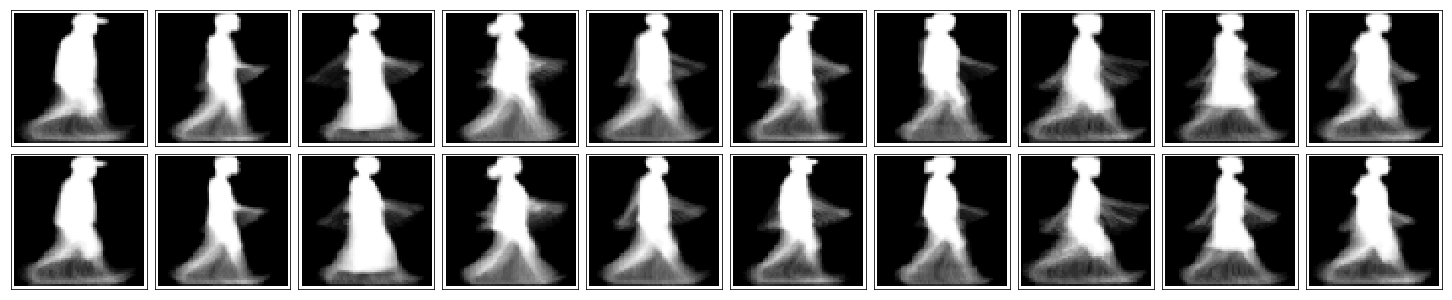

In [17]:
# Val X
val_x = gallery_full[2500:, 2]
val_x = np.reshape(val_x, [val_x.shape[0], val_x.shape[1], val_x.shape[2], 1])
# Val Y
val_y = gallery_full[2500:, 3]
val_y = np.reshape(val_y, [val_y.shape[0], val_y.shape[1], val_y.shape[2], 1])
print('val_x', val_x.shape, 'val_y', val_y.shape)

fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = val_x[:10]
# reconstructed = sess.run(decoded, feed_dict=feed_3)
target_imgs = val_y[:10]
                    
# plot out
for images, row in zip([in_imgs, target_imgs], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((64, 64)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


fig.tight_layout(pad=0.1)


# Test Model: 5f-full_add_more_data_E2E_lr=0.0008_bs=80_nl=3.ckpt

In [20]:
gallery_full = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_full_Seq00', mode='rb'))
probe_full = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_full_Seq01', mode='rb'))

# 5f
gallery_5f = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_5f_Seq00', mode='rb'))
probe_5f = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_5f_Seq01', mode='rb'))

gallery_5f_2 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_5f_2_Seq00', mode='rb'))
probe_5f_2 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_5f_2_Seq01', mode='rb'))

gallery_5f_3 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_5f_3_Seq00', mode='rb'))
probe_5f_3 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_5f_3_Seq01', mode='rb'))

gallery_5f_4 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_5f_4_Seq00', mode='rb'))
probe_5f_4 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_5f_4_Seq01', mode='rb'))

gallery_5f_5 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_5f_5_Seq00', mode='rb'))
probe_5f_5 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_5f_5_Seq01', mode='rb'))

gallery_5f_6 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_5f_6_Seq00', mode='rb'))
probe_5f_6 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_5f_6_Seq01', mode='rb'))

gallery_full = gallery_full/float(255)
probe_full = probe_full/float(255)

gallery_5f = gallery_5f/float(255)
probe_5f = probe_5f/float(255)

gallery_5f_2 = gallery_5f_2/float(255)
probe_5f_2 = probe_5f_2/float(255)

gallery_5f_3 = gallery_5f_3/float(255)
probe_5f_3 = probe_5f_3/float(255)

gallery_5f_4 = gallery_5f_4/float(255)
probe_5f_4 = probe_5f_4/float(255)

gallery_5f_5 = gallery_5f_5/float(255)
probe_5f_5 = probe_5f_5/float(255)

gallery_5f_6 = gallery_5f_6/float(255)
probe_5f_6 = probe_5f_6/float(255)

In [22]:
# Train X
train_x = np.concatenate([gallery_5f[:2146, 3], probe_5f[:2146, 3], gallery_5f_2[:2146, 3], 
                          probe_5f_2[:2146, 3], gallery_5f_3[:2146, 3], probe_5f_3[:2146, 3],
                          gallery_5f_4[:2146, 3], probe_5f_4[:2146, 3], gallery_5f_5[:2146, 3], 
                          probe_5f_5[:2146, 3], gallery_5f_6[:2146, 3], probe_5f_6[:2146, 3]],axis=0)
train_x = np.reshape(train_x, [train_x.shape[0], train_x.shape[1], train_x.shape[2], 1])
# Train Y
train_y = np.concatenate([gallery_full[:2146, 3], probe_full[:2146, 3], gallery_full[:2146, 3], 
                          probe_full[:2146, 3], gallery_full[:2146, 3], probe_full[:2146, 3],
                          gallery_full[:2146, 3], probe_full[:2146, 3], gallery_full[:2146, 3], 
                          probe_full[:2146, 3], gallery_full[:2146, 3], probe_full[:2146, 3]], axis=0)
train_y = np.reshape(train_y, [train_y.shape[0], train_y.shape[1], train_y.shape[2], 1])
print('train_x', train_x.shape, 'train_y', train_y.shape)

# Val X
val_x = np.concatenate([gallery_5f[2146:2646, 3], gallery_5f_2[2146:2646, 3], gallery_5f_3[2146:2646, 3],
                        gallery_5f_4[2146:2646, 3], gallery_5f_5[2146:2646, 3], gallery_5f_6[2146:2646, 3], 
                        probe_5f[2146:2646, 3], probe_5f_2[2146:2646, 3], probe_5f_3[2146:2646, 3],
                        probe_5f_4[2146:2646, 3], probe_5f_5[2146:2646, 3], probe_5f_6[2146:2646, 3]], axis=0)
val_x = np.reshape(val_x, [val_x.shape[0], val_x.shape[1], val_x.shape[2], 1])
# Val Y
val_y = np.concatenate([gallery_full[2146:2646, 3], gallery_full[2146:2646, 3], gallery_full[2146:2646, 3],
                        gallery_full[2146:2646, 3], gallery_full[2146:2646, 3], gallery_full[2146:2646, 3],
                        probe_full[2146:2646, 3], probe_full[2146:2646, 3], probe_full[2146:2646, 3],
                       probe_full[2146:2646, 3], probe_full[2146:2646, 3], probe_full[2146:2646, 3]], axis=0)
val_y = np.reshape(val_y, [val_y.shape[0], val_y.shape[1], val_y.shape[2], 1])
print('val_x', val_x.shape, 'val_y', val_y.shape)

# Test X
test_x = np.concatenate([gallery_5f[2646:, 3], gallery_5f_2[2646:, 3], gallery_5f_3[2646:, 3],
                         gallery_5f_4[2646:, 3], gallery_5f_5[2646:, 3], gallery_5f_6[2646:, 3],
                         probe_5f[2646:, 3], probe_5f_2[2646:, 3], probe_5f_3[2646:, 3],
                         probe_5f_4[2646:, 3], probe_5f_5[2646:, 3], probe_5f_6[2646:, 3]], axis=0)
test_x = np.reshape(test_x, [test_x.shape[0], test_x.shape[1], test_x.shape[2], 1])
# Test Y
test_y = np.concatenate([gallery_full[2646:, 3], gallery_full[2646:, 3], gallery_full[2646:, 3], 
                         gallery_full[2646:, 3], gallery_full[2646:, 3], gallery_full[2646:, 3], 
                         probe_full[2646:, 3], probe_full[2646:, 3], probe_full[2646:, 3],
                         probe_full[2646:, 3], probe_full[2646:, 3], probe_full[2646:, 3]], axis=0)
test_y = np.reshape(test_y, [test_y.shape[0], test_y.shape[1], test_y.shape[2], 1])
print('test_x', test_x.shape, 'test_y', test_y.shape)

train_x (25752, 64, 64, 1) train_y (25752, 64, 64, 1)
val_x (6000, 64, 64, 1) val_y (6000, 64, 64, 1)
test_x (6000, 64, 64, 1) test_y (6000, 64, 64, 1)


In [19]:
def get_batches(data, target, batch_size):
    n_batches = len(data)//batch_size
    data = data[:batch_size * n_batches]
    target = target[:batch_size * n_batches]
    for ii in range(0, batch_size*n_batches, batch_size):
        data_batch = data[ii:ii + batch_size]
        target_batch = target[ii:ii + batch_size]
        
        yield data_batch, target_batch
        
def cal_accuracy(decoded, target):
    error = abs(decoded - target)
    Acc = (np.sum(error <= 0.08)/(decoded.shape[0]*decoded.shape[1]*decoded.shape[2]*decoded.shape[3]))*100
    
    return Acc

def save_decoded(decoded_batch, save_path, batch_number):
    reshape = np.reshape(decoded_batch, [decoded_batch.shape[0], decoded_batch.shape[1], decoded_batch.shape[2]])
    for ii, image in enumerate(reshape):
        imsave('{}/{}.png'.format(save_path, ii + batch_number*50 + 1), image)

In [43]:
for ii in range(6):
    
    New_folder_path = './OULP-C1V2_Pack/OULP-GEI-(64x64)-5f-full_add_more_data_model_128dims/decoded_probe_5f_{}-full'.format(ii+1)
#     os.makedirs(New_folder_path)

    test_batch_size = 50
    loaded_graph = tf.Graph()
    save_model_path = './checkpoints_view_invariant/5f-full_add_more_data_E2E_lr=6e-05_bs=80_nl=3.ckpt'
    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        test_inputs = loaded_graph.get_tensor_by_name('inputs:0')
        test_targets = loaded_graph.get_tensor_by_name('targets:0')
        test_training = loaded_graph.get_tensor_by_name('training:0')
        test_keep_p = loaded_graph.get_tensor_by_name('keep_prob:0')

        test_decoded = loaded_graph.get_tensor_by_name('output_layer/output:0')
        test_MSE= loaded_graph.get_tensor_by_name('MSE:0')

        test_mse = []
        test_acc = []
        mean_test_mse = 0
        mean_test_acc = 0

        for ii, (test_batch, test_target_batch) in enumerate(get_batches(
#                                          np.concatenate([val_x[3000+ii*500:3000+(ii+1)*500], test_x[3000+ii*500:3000+(ii+1)*500]], axis=0), 
#                                          np.concatenate([val_y[3000+ii*500:3000+(ii+1)*500], test_y[3000+ii*500:3000+(ii+1)*500]], axis=0), test_batch_size)):
                                          np.concatenate([val_x[ii*500:(ii+1)*500], test_x[ii*500:(ii+1)*500]], axis=0), 
                                          np.concatenate([val_y[ii*500:(ii+1)*500], test_y[ii*500:(ii+1)*500]], axis=0), test_batch_size)):                  
            feed_dict = {test_inputs: test_batch,
                         test_targets: test_target_batch,
                         test_training: 1,
                         test_training:True
                        }

            test_mean_squared_error, test_decoded_img = sess.run([test_MSE, test_decoded], feed_dict=feed_dict)
#             save_decoded(test_decoded_img, New_folder_path, ii)

            test_ACC = cal_accuracy(test_decoded_img, test_target_batch)

            test_mse.append(test_mean_squared_error)
            test_acc.append(test_ACC)

        mean_test_mse = np.mean(np.array(test_mse))
        mean_test_acc = np.mean(np.array(test_acc))

        print('mean_test_mse: {:.4f}'.format(mean_test_mse*255.0*255.0))
        print('mean_test_acc: {:.4f}'.format(mean_test_acc))

INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/5f-full_add_more_data_E2E_lr=6e-05_bs=80_nl=3.ckpt
mean_test_mse: 161.1768
mean_test_acc: 91.7257
INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/5f-full_add_more_data_E2E_lr=6e-05_bs=80_nl=3.ckpt
mean_test_mse: 135.6046
mean_test_acc: 92.5494
INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/5f-full_add_more_data_E2E_lr=6e-05_bs=80_nl=3.ckpt
mean_test_mse: 133.0480
mean_test_acc: 92.5996
INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/5f-full_add_more_data_E2E_lr=6e-05_bs=80_nl=3.ckpt
mean_test_mse: 142.1793
mean_test_acc: 92.3515
INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/5f-full_add_more_data_E2E_lr=6e-05_bs=80_nl=3.ckpt
mean_test_mse: 131.6260
mean_test_acc: 92.6644
INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/5f-full_add_more_data_E2E_lr=6e-05_bs=80_nl=3.ckpt
mean_test_mse: 137.3023
mean_test

In [42]:
np.mean(np.array([91.7257,92.5493, 92.5996, 92.3515, 92.6644, 92.4110, 91.4567, 92.4220, 92.4199, 92.2910, 92.4515, 92.2778]))

92.301699999999997

In [44]:
np.mean(np.array([166.2542,137.7756,135.8506,142.7763,135.0073,139.7670,161.1768,135.6046,133.0480,142.1793,131.6260,137.3023]))

141.53066666666666

# get some samples

In [56]:
diff_list = []
for ii in range(1,11):
    diff_list.append(imread('./OULP-C1V2_Pack/Samples/diff_{}.png'.format(ii)))
diff_list = np.reshape(np.array(diff_list), [10,64,64,1])

INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/5f-full_add_more_data_E2E_lr=6e-05_bs=80_nl=3.ckpt


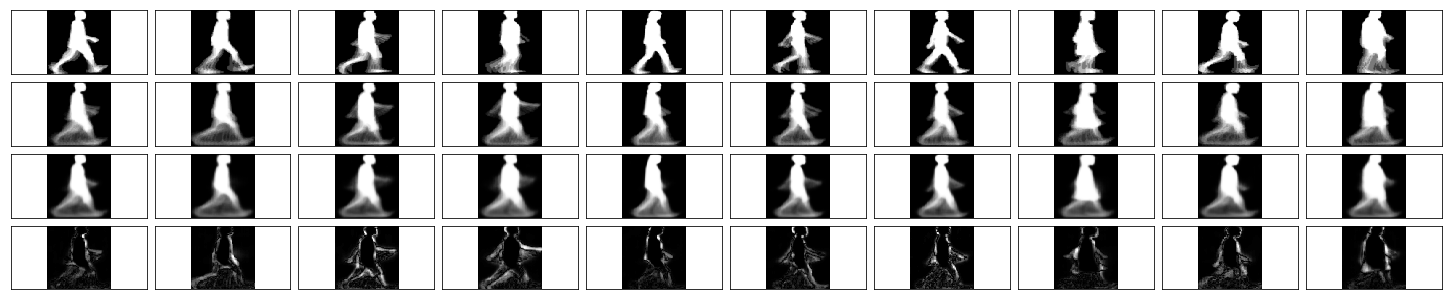

In [61]:
loaded_graph = tf.Graph()
save_model_path = './checkpoints_view_invariant/5f-full_add_more_data_E2E_lr=6e-05_bs=80_nl=3.ckpt'
with tf.Session(graph=loaded_graph) as sess:
        # Load model
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
    test_inputs = loaded_graph.get_tensor_by_name('inputs:0')
    test_targets = loaded_graph.get_tensor_by_name('targets:0')
    test_training = loaded_graph.get_tensor_by_name('training:0')
    test_keep_p = loaded_graph.get_tensor_by_name('keep_prob:0')

    test_decoded = loaded_graph.get_tensor_by_name('output_layer/output:0')
    test_MSE= loaded_graph.get_tensor_by_name('MSE:0')

#     test_mse = []
#     test_acc = []
#     mean_test_mse = 0
#     mean_test_acc = 0

#     for ii, (test_batch, test_target_batch) in enumerate(get_batches(
#                                          np.concatenate([val_x[3000+ii*500:3000+(ii+1)*500], test_x[3000+ii*500:3000+(ii+1)*500]], axis=0), 
#                                          np.concatenate([val_y[3000+ii*500:3000+(ii+1)*500], test_y[3000+ii*500:3000+(ii+1)*500]], axis=0), test_batch_size)):
#     im = np.reshape(imresize(imread('./OULP-C1V2_Pack/Samples/0000059_85_GEI_1f.png'), [64,64],  interp='nearest'), [1,64,64,1])
    in_imgs = test_x[10:20]
    feed_dict = {test_inputs: in_imgs,
                         test_training: 1,
                         test_training:True
                        }

    test_decoded_img = sess.run(test_decoded, feed_dict=feed_dict)
#     imsave('./OULP-C1V2_Pack/Samples/pred_1f_2.png', np.reshape(test_decoded_img, [64,64]))
    
    fig, axes = plt.subplots(nrows=4, ncols=10, sharex=True, sharey=True, figsize=(20,4))

    target_imgs = test_y[10:20]
                    
                    # plot out
    for images, row in zip([in_imgs, target_imgs, test_decoded_img, diff_list], axes):
        for img, ax in zip(images, row):
            ax.imshow(img.reshape((64, 64)), cmap='Greys_r')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)


    fig.tight_layout(pad=0.1)
#     for idx, pred_img in enumerate(test_decoded_img):
#         imsave('./OULP-C1V2_Pack/Samples/pred_{}.png'.format(idx+1), np.reshape(pred_img, [64,64])) 
        
#     for idx, pred_img in enumerate(test_x[10:20]):
#         imsave('./OULP-C1V2_Pack/Samples/test_x_{}.png'.format(idx+1), np.reshape(pred_img, [64,64])) 
        
#     for idx, pred_img in enumerate(test_y[10:20]):
#         imsave('./OULP-C1V2_Pack/Samples/test_y_{}.png'.format(idx+1), np.reshape(pred_img, [64,64])) 
#     save_decoded(test_decoded_img, New_folder_path, ii)

#     test_ACC = cal_accuracy(test_decoded_img, test_target_batch)

#     test_mse.append(test_mean_squared_error)
#     test_acc.append(test_ACC)
